In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Spearman Plot of absolute values of ADGRD1 transcripts

In [3]:
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(%)' not in col]
adgrd1 = adgrd1[filtered_columns]

num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]

tpm_columsn = adgrd1.columns[7:]
for col in tpm_columsn:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

#rows 2,5,8,13
transcripts_to_correlate= ["NM_198827.5","NSTRG.20613.2", "NSTRG.20613.4","XM_005253566.2"]

transcripts_df = adgrd1.loc[adgrd1['transcript_id'].isin(transcripts_to_correlate)]
transcripts_df = transcripts_df.iloc[:,7:]

row1 = transcripts_df.loc[1] #"NM_198827.5
row4 = transcripts_df.loc[4] #NSTRG.20613.2
row7 = transcripts_df.loc[7] #NSTRG.20613.4
row12 = transcripts_df.loc[12] #XM_005253566.2"

corr2_5, p_value1 = pearsonr(row1, row4)
corr2_8, p_value2 = pearsonr(row1, row7)
corr2_13, p_value3= pearsonr(row1, row12)

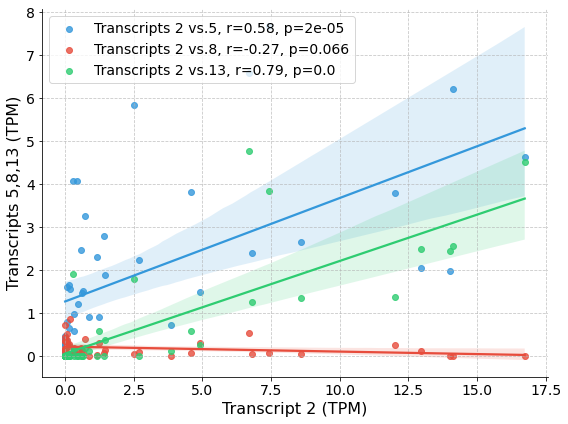

In [15]:
# Set the figure size (adjust the width and height as needed)
plt.figure(figsize=(8, 6))
plt.rc('text', usetex=False)

custom_palette = sns.color_palette(['#3498db', '#e74c3c', '#2ecc71'])
sns.set_palette(custom_palette)

# Plot the regression lines with labels
sns.regplot(x=row1, y=row4, ci=95, label="Transcripts 2 vs.5, r="+str(round(corr2_5,2))+", p="+str(round(p_value1,5)))
sns.regplot(x=row1, y=row7, ci=95, label="Transcripts 2 vs.8, r="+str(round(corr2_8,2))+", p="+str(round(p_value2,4)))
sns.regplot(x=row1, y=row12, ci=95,label="Transcripts 2 vs.13, r="+str(round(corr2_13,2))+", p="+str(round(p_value3,5)))

# Set axis labels
plt.xlabel('Transcript 2 (TPM)', fontsize=16)
plt.ylabel('Transcripts 5,8,13 (TPM)', fontsize=16)

# Increase tick label font size for both x and y axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines
plt.grid(True)

legend = plt.legend(loc='upper left', fontsize=14)
legend.get_frame().set_edgecolor('0.8')

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Save the figure as a PNG file (you can change the format and filename as needed)
plt.tight_layout()
plt.savefig('your_figure.png', dpi=600)

# Show the plot (optional)
plt.show()

# Violin plot of relative expressions of all transcripts

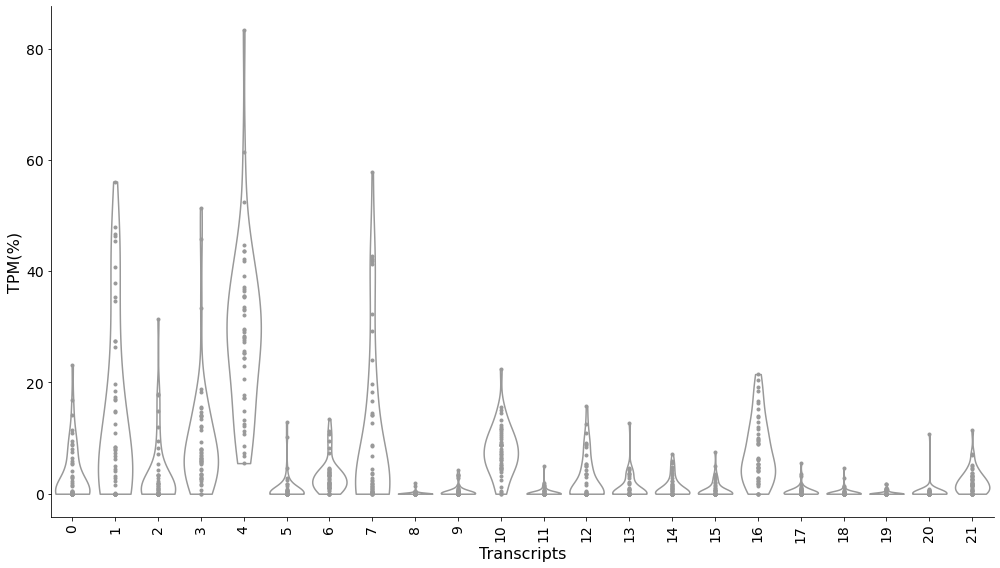

In [55]:
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(mean)' not in col]
adgrd1 = adgrd1[filtered_columns]
num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]
adgrd1

tpm_columns = adgrd1.columns[7:]
for col in tpm_columns:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

# Create a DataFrame for plotting
plot_df = adgrd1[tpm_columns]

# Transpose the DataFrame to have TPM(%) columns on the x-axis
plot_df = plot_df.T

# Set figure size
plt.figure(figsize=(14, 8))

# Create the violin plot
sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0)
# sns.stripplot(data=plot_df, jitter=True, color='black', alpha=0.5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set labels and title
plt.xlabel('Transcripts', fontsize=16)
plt.ylabel('TPM(%)', fontsize=16)
# plt.title('Violin Plot of TPM(%) for Each Row', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
help(sns.violinplot)

Help on function violinplot in module seaborn.categorical:

violinplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
    Draw a combination of boxplot and kernel density estimate.
    
    A violin plot plays a similar role as a box and whisker plot. It shows the
    distribution of quantitative data across several levels of one (or more)
    categorical variables such that those distributions can be compared. Unlike
    a box plot, in which all of the plot components correspond to actual
    datapoints, the violin plot features a kernel density estimation of the
    underlying distribution.
    
    This can be an effective and attractive way to show multiple distributions
    of data at once, but keep in mind that the estimation procedure is
    influenced by the

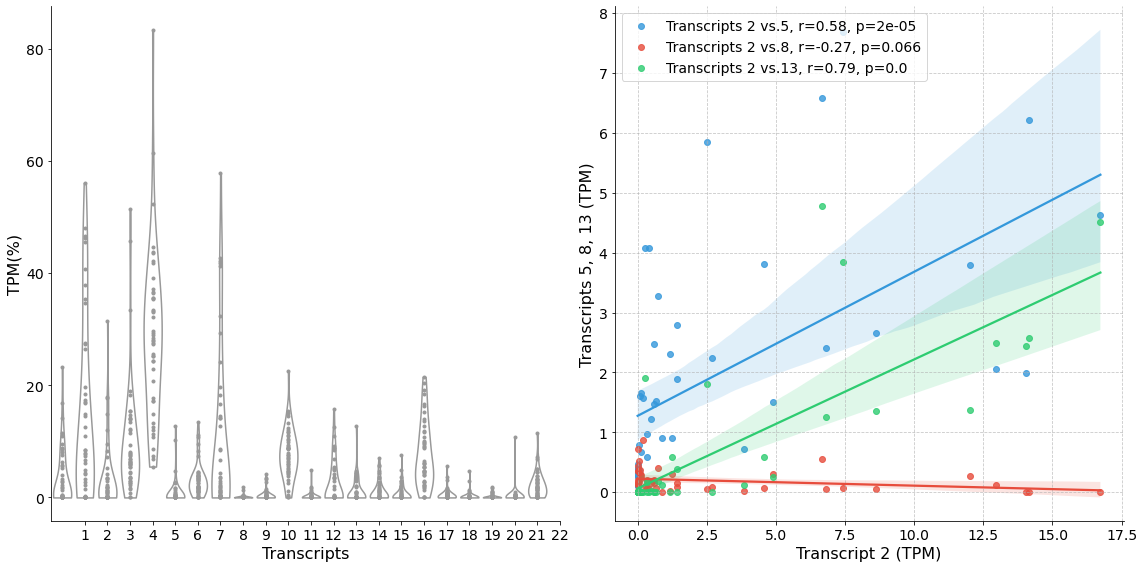

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
adgrd1 = pd.read_csv("Suppl_Table_S5_Transcripts_in_tissues.xlsx - ADGRD1.csv")
adgrd1 = adgrd1.iloc[0:22]

filtered_columns = [col for col in adgrd1.columns if '(sd)' not in col and '(mean)' not in col]
adgrd1 = adgrd1[filtered_columns]
num_columns_to_keep = len(adgrd1.columns) - 3
adgrd1 = adgrd1.iloc[:, :num_columns_to_keep]

tpm_columns = adgrd1.columns[7:]
for col in tpm_columns:
    adgrd1[col] = adgrd1[col].str.replace(',', '.').astype(float)

# Create a DataFrame for plotting
plot_df = adgrd1[tpm_columns]

# Transpose the DataFrame to have TPM(%) columns on the x-axis
plot_df = plot_df.T

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the violin plot in the first subplot
sns.violinplot(data=plot_df, inner="point", scale="width", color='white', edgecolor='black', cut=0, ax=axs[0])

# Customize the first subplot
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].set_xlabel('Transcripts', fontsize=16)
axs[0].set_ylabel('TPM(%)', fontsize=16)
axs[0].tick_params(labelsize=14)
axs[0].set_xticks(np.arange(1, 23))
axs[0].set_xticklabels(np.arange(1, 23), rotation=0)  # Set custom x-axis labels

# Plot the second plot in the second subplot
custom_palette = sns.color_palette(['#3498db', '#e74c3c', '#2ecc71'])
sns.set_palette(custom_palette)
sns.regplot(x=row1, y=row4, ci=95, label="Transcripts 2 vs.5, r="+str(round(corr2_5,2))+", p="+str(round(p_value1,5)), ax=axs[1])
sns.regplot(x=row1, y=row7, ci=95, label="Transcripts 2 vs.8, r="+str(round(corr2_8,2))+", p="+str(round(p_value2,4)), ax=axs[1])
sns.regplot(x=row1, y=row12, ci=95, label="Transcripts 2 vs.13, r="+str(round(corr2_13,2))+", p="+str(round(p_value3,5)), ax=axs[1])

# Customize the second subplot
axs[1].set_xlabel('Transcript 2 (TPM)', fontsize=16)
axs[1].set_ylabel('Transcripts 5, 8, 13 (TPM)', fontsize=16)
axs[1].tick_params(labelsize=14)
axs[1].grid(True)
legend = axs[1].legend(loc='upper left', fontsize=14)
legend.get_frame().set_edgecolor('0.8')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('combined_figure.png', dpi=600)

# Show the plot (optional)
plt.show()